## Fully connected Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/P1_Final/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

/content/drive/My Drive/P1_Final
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=ff447ea75060c8de677be8b0f345a1ead088ac9e769a3be5877409b8fb12fc17
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from plotlib_helper.ipynb
importing Jupyter notebook from datapreprocess_helper.ipynb


In [ ]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

path = "/content/drive/My Drive/P1_Final/"

## Load Preprocessed Data

In [ ]:
train_read = os.path.join(path,"data/P1_NeuralNets_preprocess_TRAINSET.csv")
test_read = os.path.join(path,"data/P1_NeuralNets_preprocess_TESTSET.csv")
df_train = pd.read_csv(train_read)
df_test= pd.read_csv(test_read)

print("Successfully loaded preprocessed data sets")

Successfully loaded preprocessed data sets


In [ ]:
df_train[0:5]

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto-tcp,proto-udp,state-CON,state-FIN,state-INT,state-REQ,service-dhcp,service-dns,service-ftp,service-ftp-data,service-http,service-irc,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,attack_cat-Backdoor,attack_cat-DoS,attack_cat-Exploits,attack_cat-Fuzzers,attack_cat-Generic,attack_cat-Normal,attack_cat-Reconnaissance,attack_cat-Worms
0,0.174677,-0.048030,-0.044580,-0.055932,-0.077782,-0.624123,-1.042527,1.554587,-0.610101,-0.216534,-0.061567,-0.055844,0.465346,0.190108,-0.125318,0.921565,1.185734,0.159327,0.116305,1.185734,-0.548899,-0.511111,-0.542046,-0.358947,-0.230851,-0.197312,-0.057780,-0.931741,-0.340489,-0.811222,-0.817648,-0.890285,-0.790888,1,5.266767,-0.278273,-0.855604,-0.927297,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.266079,0.216764,0.076680,0.169685,-0.069496,-0.623956,-1.042527,1.554587,-0.607521,-0.211838,0.228984,0.022395,-0.036952,0.131492,0.015802,-0.156252,1.185734,0.698403,-0.024568,1.185734,1.387128,0.976391,1.689012,3.682398,-0.171035,-0.197312,-0.057780,-0.857352,-0.340489,-0.911291,-0.817648,-0.890285,-0.865254,0,-0.175733,-0.278273,-0.955804,-0.927297,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,-0.198900,-0.100988,-0.135525,-0.057916,-0.082207,2.287049,0.822646,-0.717582,2.795841,-0.219823,-0.072328,-0.102787,-0.182312,-0.159170,-0.137528,-0.179661,-0.843349,-0.672360,-0.673920,-0.843349,-0.548899,-0.511111,-0.542046,-0.278781,-0.486063,-0.197312,-0.057780,-0.931741,0.851546,-0.911291,-0.817648,-0.890285,-0.716523,0,-0.175733,-0.278273,-0.855604,-0.927297,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.111472,-0.058621,-0.074895,-0.054992,-0.075909,-0.623952,-1.042527,1.554587,-0.609941,-0.200730,-0.050806,-0.071491,0.002937,0.025344,-0.037382,-0.163820,1.185734,2.244595,1.652802,1.185734,1.227288,1.155081,1.199529,-0.198614,0.060251,0.689287,-0.056479,-0.782963,-0.340489,-0.911291,-0.817648,-0.890285,-0.865254,0,-0.175733,0.719265,-0.955804,-0.778749,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.123810,-0.058621,-0.090052,-0.054433,-0.080667,-0.623945,0.822646,1.554587,-0.609873,-0.214631,-0.050806,-0.087139,-0.033117,0.059835,-0.046634,-0.161566,1.185734,1.330366,1.982709,1.185734,1.731003,1.039913,2.288498,-0.132594,-0.306617,0.689287,-0.057780,-0.559796,-0.340489,-0.911291,-0.817648,-0.890285,-0.939620,0,-0.175733,0.719265,-0.855604,-0.778749,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_test[0:5]

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto-tcp,proto-udp,state-CON,state-FIN,state-INT,state-REQ,service-dhcp,service-dns,service-ftp,service-ftp-data,service-http,service-irc,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,attack_cat-Backdoor,attack_cat-DoS,attack_cat-Exploits,attack_cat-Fuzzers,attack_cat-Generic,attack_cat-Normal,attack_cat-Reconnaissance,attack_cat-Worms
0,0.151351,-0.044027,-0.056241,-0.047046,-0.063536,-0.654846,-1.10062,1.574372,-0.636437,-0.198249,-0.040185,-0.057364,0.277377,0.264234,0.110463,-0.104007,1.247402,-0.037970,0.610202,1.247476,2.615925,2.600411,2.425021,-0.189703,0.156282,0.96478,-0.060791,-0.781545,-0.419802,-0.748606,-0.677422,-0.700417,-0.666199,0,-0.139396,0.739088,-0.778385,-0.707896,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.357149,-0.044027,-0.041792,-0.046999,-0.063024,-0.654876,-1.10062,1.574372,-0.636465,-0.201148,-0.040185,-0.057364,0.511351,0.370800,0.328412,-0.091636,1.247402,-0.103610,1.780554,1.247476,2.214287,2.463579,1.775220,-0.184714,0.072002,0.96478,-0.060739,-0.781545,-0.419802,-0.748606,-0.677422,-0.700417,-0.666199,0,-0.139396,0.739088,-0.778385,-0.707896,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.179525,-0.044027,-0.056241,-0.046981,-0.063743,-0.654853,-1.10062,1.574372,-0.636442,-0.199267,-0.040185,-0.057364,0.309462,0.289103,0.116760,-0.088841,1.247402,0.773169,0.284304,1.247476,3.661019,3.174699,3.885098,-0.184714,0.135212,0.96478,-0.061118,-0.850202,-0.419802,-0.748606,-0.677422,-0.700417,-0.732632,0,-0.139396,0.739088,-0.601005,-0.845018,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.153842,-0.044027,-0.041792,-0.047102,-0.062218,-0.654834,-1.10062,1.574372,-0.636439,-0.195908,-0.040185,-0.057364,0.280213,0.188327,0.155613,-0.115793,1.247402,0.524421,0.179489,1.247476,2.231467,1.909410,2.395153,-0.199681,0.130998,0.96478,-0.059466,-0.781545,-0.419802,0.755444,-0.677422,-0.700417,-0.666199,0,-0.139396,0.739088,-0.778385,-0.776457,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.270656,-0.031872,-0.056241,-0.046664,-0.063819,-0.654863,-1.10062,1.574372,-0.636449,-0.201059,-0.040185,-0.057364,0.312503,0.421984,0.130877,-0.089645,1.247402,0.259641,-0.024224,1.247476,1.598445,1.630680,1.437686,-0.224625,0.126784,0.96478,-0.061255,-0.850202,-0.419802,-0.748606,-0.677422,-0.700417,-0.732632,0,-0.139396,0.739088,-0.689695,-0.845018,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Convert Data into Numpy Arrays

In [ ]:
# converting x, y numpy arrays for TensorFlow 
x_train, y_train = dataprep.to_xy(df_train, 'label')
x_test, y_test = dataprep.to_xy(df_test, 'label')
print(f"Training set shape x:{x_train.shape} y:{y_train.shape}")
print(f"Testing set shape x:{x_test.shape} y:{y_test.shape}")
y_train

Training set shape x:(81173, 65) y:(81173, 2)
Testing set shape x:(35179, 65) y:(35179, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Model Creation and Training

In [ ]:
filepath_savemodel = os.path.join(path,"dnn/proj1_neuralnets.hdf5")
# checkpoint to save the best weights 
checkpoint = ModelCheckpoint(filepath= filepath_savemodel, verbose=0, save_best_only=True) # save best model

for i in range(5):
    neuralnets_model = Sequential()
    neuralnets_model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    neuralnets_model.add(Dense(10, activation='relu'))
    neuralnets_model.add(Dense(y_train.shape[1], activation='softmax'))
    neuralnets_model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, verbose=1, mode='auto')

    neuralnets_model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpoint],verbose=2,epochs=100)


neuralnets_model.load_weights(filepath_savemodel) # load weights from best model


Epoch 1/100
2537/2537 - 4s - loss: 0.0213 - val_loss: 0.0024
Epoch 2/100
2537/2537 - 3s - loss: 8.5489e-04 - val_loss: 0.0073
Epoch 3/100
2537/2537 - 3s - loss: 5.7633e-04 - val_loss: 0.0014
Epoch 4/100
2537/2537 - 3s - loss: 4.4849e-04 - val_loss: 9.4972e-04
Epoch 5/100
2537/2537 - 3s - loss: 2.1582e-04 - val_loss: 0.0026
Epoch 6/100
2537/2537 - 3s - loss: 6.3082e-04 - val_loss: 0.0016
Epoch 7/100
2537/2537 - 3s - loss: 1.8339e-04 - val_loss: 0.0016
Epoch 00007: early stopping
Epoch 1/100
2537/2537 - 3s - loss: 0.0352 - val_loss: 0.0022
Epoch 2/100
2537/2537 - 3s - loss: 7.6801e-04 - val_loss: 0.0012
Epoch 3/100
2537/2537 - 3s - loss: 6.3056e-04 - val_loss: 0.0042
Epoch 4/100
2537/2537 - 3s - loss: 4.9316e-04 - val_loss: 6.8206e-04
Epoch 5/100
2537/2537 - 3s - loss: 2.5235e-04 - val_loss: 1.2342e-04
Epoch 6/100
2537/2537 - 3s - loss: 4.9825e-04 - val_loss: 0.0011
Epoch 7/100
2537/2537 - 3s - loss: 1.9276e-06 - val_loss: 5.7643e-04
Epoch 8/100
2537/2537 - 3s - loss: 6.8952e-07 - val_lo

## Model Performance Evaluation

Performance Metrics for Neural Networks - Binary Classification
---------------------------------------
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


[[ 9625     0]
 [    0 25554]]


Plotting confusion matrix


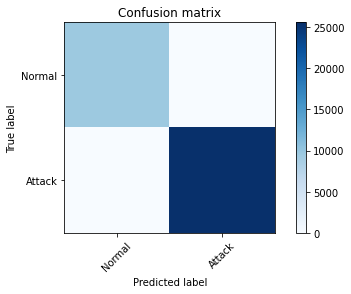



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9625
           1       1.00      1.00      1.00     25554

    accuracy                           1.00     35179
   macro avg       1.00      1.00      1.00     35179
weighted avg       1.00      1.00      1.00     35179




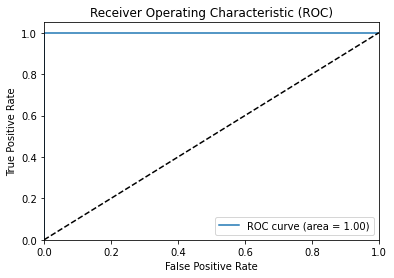

In [ ]:
pred = neuralnets_model.predict(x_test)
pred = np.argmax(pred,axis=1)
graphplot.performance_metrics(pred, y_test, ["Normal", "Attack"], "Performance Metrics for Neural Networks - Binary Classification")
